# Determining $\Sigma_{10}$, $\Sigma_{10,\text{flux selected}}$ , $\Sigma_{20}$, $\Sigma_{20,\text{flux selected}}$ for `DESIJ2158+0257`

**Author(s)**: Fahim Rajit Hossain, S M Rafee Adnan, Sulyman Hossain, Anowar Shajib <br>
**Acknowledgement(s)**: Ahmad Al - Imtiaz, Mamunur Rashid

### Calculating $\Sigma_{10}$


In the context of the paper "[The Sloan Lens ACS Survey. VIII. The Relation between Environment and Internal Structure of Early-Type Galaxies](https://arxiv.org/pdf/0806.1056.pdf)," the projected number density of galaxies inside the tenth nearest neighbor ($\Sigma_{10}$) refers to a measure of the local galaxy density surrounding a target early-type galaxy.

To explain this concept from the paper, we need to understand how the authors calculated $\Sigma_{10}$ and its significance in studying the relationship between galaxy environment and the internal structure of early-type galaxies.

1. Calculation of $\Sigma_{10}$:
In the paper, the authors studied a sample of early-type galaxies with measured gravitational lensing effects. For each target early-type galaxy, they identified its ten nearest neighbor galaxies based on their projected angular distances. The projected angular distance is the angular separation between the target galaxy and its neighbors as seen from our perspective on Earth.

$\Sigma_{10}$ is then calculated as the number of galaxies (including the target galaxy itself) within the combined area covered by the ten nearest neighbors, divided by the total area of that region. In other words, $\Sigma_{10}$ represents the number density of galaxies in the vicinity of the target galaxy, considering the influence of its ten closest neighbors.

2. Significance of $\Sigma_{10}$:
The projected number density $\Sigma_{10}$ is a crucial parameter to study the local galaxy environment around each early-type galaxy in the sample. It provides a measure of the galaxy density on small scales, capturing the immediate gravitational influences of nearby galaxies on the target galaxy.

By analyzing the correlation between $\Sigma_{10}$ and the internal properties of early-type galaxies (such as their effective radii and velocity dispersions), the authors can explore how the local galaxy environment affects the structure and evolution of early-type galaxies. High $\Sigma_{10}$ values imply dense environments with strong gravitational interactions, which might have implications for the growth and assembly history of the early-type galaxies.

In summary, $\Sigma_{10}$ quantifies the local galaxy density surrounding each target early-type galaxy in the sample. It plays a crucial role in understanding the impact of the immediate environment on the internal properties and evolution of these galaxies, providing insights into the complex interplay between galaxy environment and galaxy structure.

Finally calculations can be made by
$$\Sigma_{10} = 10/(\pi R_{10}^2)$$

In [1]:
!pip install photutils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 kB 28.5 MB/s eta 0:00:00


## Load data

In [2]:
import shutil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.cosmology import FlatLambdaCDM
from astropy.io import fits
from astropy.stats import SigmaClip
from astropy.visualization import simple_norm
from astropy.wcs import WCS

# from google.colab import drive
from photutils.background import Background2D, MedianBackground
from photutils.segmentation import (
    SourceCatalog,
    SourceFinder,
    deblend_sources,
    detect_sources,
)

#!pip install photutils
# drive.mount("/content/drive")

## Load Data

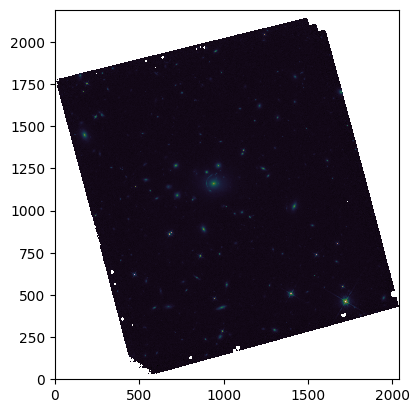

In [3]:
data, header = fits.getdata(
    "/kaggle/input/fits-file/DESIJ21580257_F140W_drz_sci.fits",
    header=True,
)

plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

## Background estimation

/tmp/ipykernel_17/3998831433.py:12: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background),
/tmp/ipykernel_17/3998831433.py:12: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


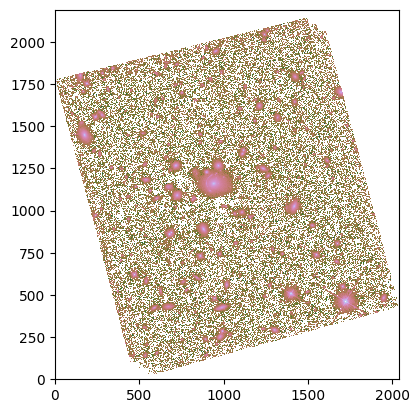

In [4]:
sigma_clip = SigmaClip(sigma=3.0)
bkg_estimator = MedianBackground()
bkg = Background2D(
    data,
    (50, 50),
    filter_size=(3, 3),
    sigma_clip=sigma_clip,
    bkg_estimator=bkg_estimator,
)

plt.imshow(
    np.log10(data - bkg.background),
    origin="lower",
    cmap="cubehelix",
    interpolation="nearest",
)

## Aperture photometry

In [5]:
np.median(bkg.background), np.median(bkg.background_rms)

bkg_subtracted_data = data - bkg.background

# Source detection and segmentation
threshold = 4 * bkg.background_rms  # changed to 4 instead of 5 to accomadate an object
# near 4 o'clock

segment_map = detect_sources(bkg_subtracted_data, threshold, npixels=10)
segm_deblend = deblend_sources(
    bkg_subtracted_data,
    segment_map,
    npixels=8,
    nlevels=32,
    contrast=0.001,
    progress_bar=False,
)

# Source catalog creation

finder = SourceFinder(npixels=10, progress_bar=False)
segment_map = finder(bkg_subtracted_data, threshold)

print(segment_map)

cat = SourceCatalog(bkg_subtracted_data, segm_deblend)
print(cat)

<photutils.segmentation.core.SegmentationImage>
shape: (2192, 2042)
nlabels: 637
labels: [  1   2   3   4   5 ... 633 634 635 636 637]
<photutils.segmentation.catalog.SourceCatalog>
Length: 658
labels: [  1   2   3   4   5 ... 654 655 656 657 658]


In [6]:
# Set axis limits
set_x_lim1, set_x_lim2 = 800 - 300, 1100 + 300
set_y_lim1, set_y_lim2 = 1050 - 300, 1300 + 300

/tmp/ipykernel_17/960423796.py:7: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/960423796.py:7: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2


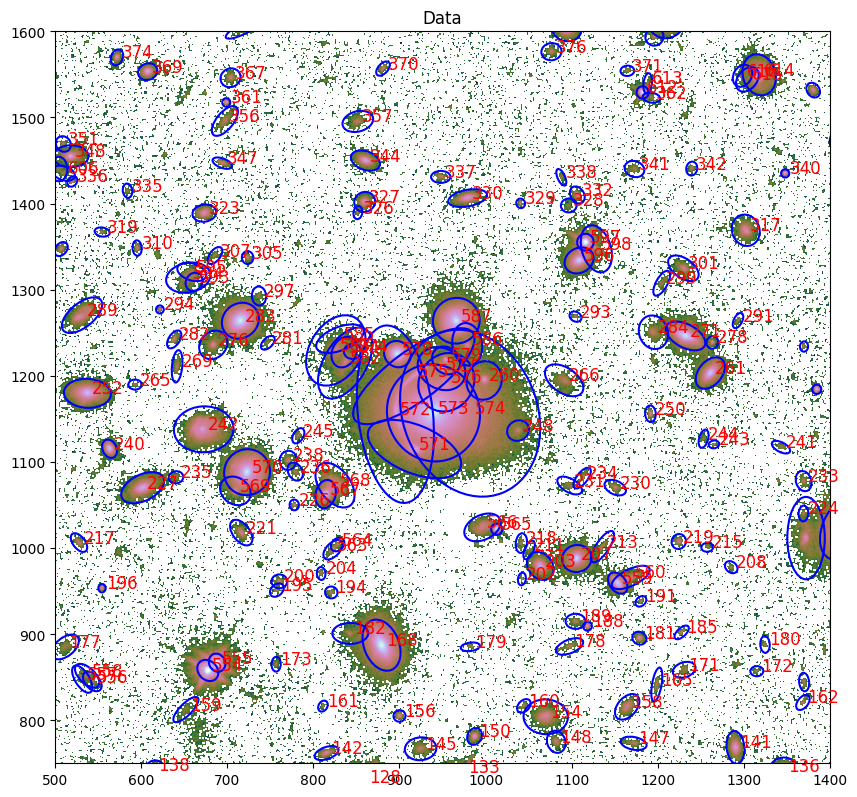

In [7]:
# Plotting

norm = simple_norm(data, "sqrt")

fig, ax1 = plt.subplots(1, 1, figsize=(10, 12.5))
ax1.imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
ax1.set_title("Data")

cat.plot_kron_apertures(ax=ax1, color="blue", lw=1.5)

for i in range(len(cat)):
    if (
        np.abs(cat.xcentroid[i] - cat.xcentroid[573]) < 430
        and np.abs(cat.ycentroid[i] - cat.ycentroid[573]) < 430
    ):
        ax1.text(
            cat.xcentroid[i] + 5,
            cat.ycentroid[i],
            f"{i}",
            c="r",
            fontsize=12
            # transform=ax1.transAxes
        )

# cat.plot_kron_apertures(ax=ax2, color='white', lw=1.5);

ax1.set_xlim(set_x_lim1, set_x_lim2)
ax1.set_ylim(set_y_lim1, set_y_lim2)

# hide all text outside of the axes
ax1.set_clip_on(True)
ax1.set_clip_box(ax1.bbox)

## Finding Central Lens

/tmp/ipykernel_17/3194242030.py:12: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background),
/tmp/ipykernel_17/3194242030.py:12: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


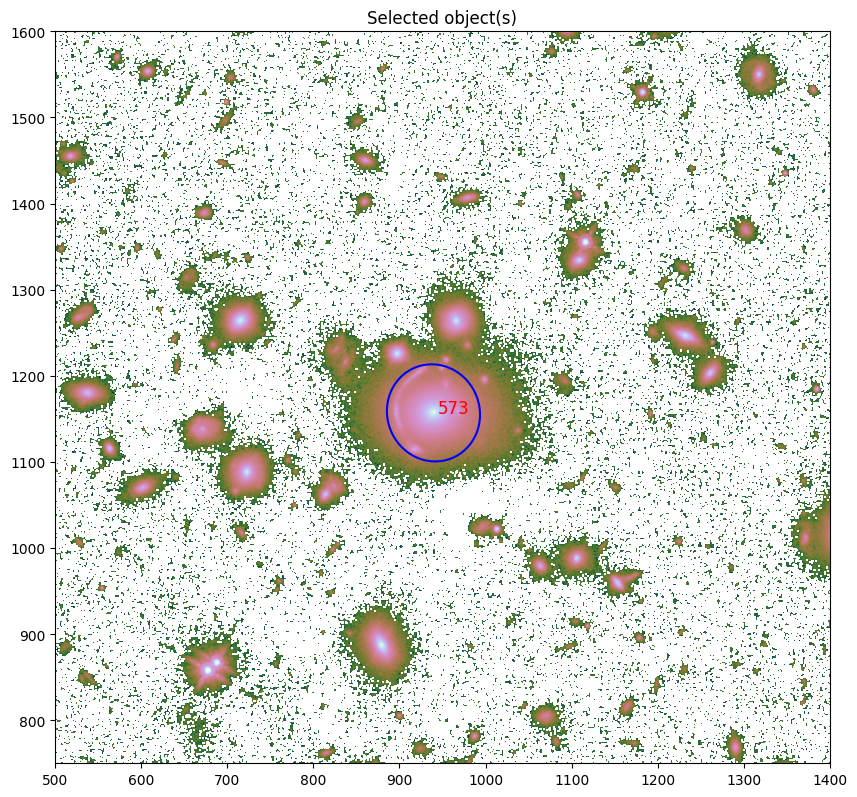

In [8]:
# Defining a function for labeling only selected objects


def label_selected_objects(selected_ids):
    # Background subtraction
    data - bkg.background

    # Plotting
    simple_norm(data, "sqrt")
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 12.5))
    ax1.imshow(
        np.log10(data - bkg.background),
        origin="lower",
        cmap="cubehelix",
        vmin=-4,
        vmax=2,
    )
    ax1.set_title("Selected object(s)")

    # Plot Kron apertures and label selected objects
    for obj_id in selected_ids:
        labels = [obj_id + 1]
        cat_subset = cat.get_labels(labels)
        cat_subset.plot_kron_apertures(ax=ax1, color="blue", lw=1.5)

        ax1.text(
            cat.xcentroid[obj_id] + 5,
            cat.ycentroid[obj_id],
            f"{obj_id}",
            c="r",
            fontsize=12
            # transform=ax1.transAxes
        )

    # Set axis limits
    ax1.set_xlim(set_x_lim1, set_x_lim2)
    ax1.set_ylim(set_y_lim1, set_y_lim2)

    # Hide text outside of the axes
    ax1.set_clip_on(True)
    ax1.set_clip_box(ax1.bbox)

    # Show the plot
    plt.show()


# Guessing the lens galaxy
id_central = 573

# Calling the function label id_central
label_selected_objects([id_central])

## Close Galaxies, Distance, Flux

In [9]:
tbl = cat.to_table()
tbl["xcentroid"].info.format = ".2f"  # optional format
tbl["ycentroid"].info.format = ".2f"
tbl["kron_flux"].info.format = ".2f"

## Creating List of neighbouring Galaxies

In [10]:
# All close galaxies

x0 = tbl["xcentroid"].value[id_central]
y0 = tbl["ycentroid"].value[id_central]
f0 = tbl["kron_flux"].value[id_central]

close_galaxies_all = []
dist_galaxies_all = []
flux_galaxies_all = []
axis_ratios_all = []

for i in range(len(tbl)):
    if i == segment_map.nlabels:
        continue
    x = tbl["xcentroid"].value[i]
    y = tbl["ycentroid"].value[i]
    f = tbl["kron_flux"].value[i]
    if np.sqrt((x - x0) ** 2 + (y - y0) ** 2) < 25 / 0.08:
        close_galaxies_all.append(i)
        flux_galaxies_all.append(f)
        dist_galaxies_all.append(np.sqrt((x - x0) ** 2 + (y - y0) ** 2))
        axis_ratios_all.append(np.sqrt(1 - tbl[i]["eccentricity"].value ** 2))

print(
    "Number of all close galaxies within 25 arcsecond radius:", len(close_galaxies_all)
)
print("Close galaxies:", (close_galaxies_all))

Number of all close galaxies within 25 arcsecond radius: 77
Close galaxies: [168, 179, 182, 188, 189, 194, 195, 200, 202, 203, 204, 207, 211, 213, 218, 221, 226, 230, 231, 234, 235, 236, 238, 242, 245, 248, 250, 260, 266, 269, 271, 274, 276, 281, 283, 284, 293, 297, 299, 305, 326, 327, 328, 329, 330, 332, 337, 338, 344, 559, 560, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 582, 583, 584, 585, 586, 587, 596, 597, 598]


In [11]:
# Close galaxies excluding sources lower than 1% of the central deflector

x0 = tbl["xcentroid"].value[id_central]
y0 = tbl["ycentroid"].value[id_central]
f0 = tbl["kron_flux"].value[id_central]

close_galaxies_1 = []
dist_galaxies_1 = []
flux_galaxies_1 = []
axis_ratios_1 = []

for i in range(len(tbl)):
    if i == segment_map.nlabels:
        continue
    x = tbl["xcentroid"].value[i]
    y = tbl["ycentroid"].value[i]
    f = tbl["kron_flux"].value[i]
    if (np.sqrt((x - x0) ** 2 + (y - y0) ** 2) < 65 / 0.08) & (f > f0 * 0.01):
        close_galaxies_1.append(i)
        flux_galaxies_1.append(f)
        dist_galaxies_1.append(np.sqrt((x - x0) ** 2 + (y - y0) ** 2))
        axis_ratios_1.append(np.sqrt(1 - tbl[i]["eccentricity"].value ** 2))
print(
    "Number of close galaxies excluding dim sources within 65 arcsecond radius:",
    len(close_galaxies_1),
)

print("Close galaxies_1_percent_flux:", (close_galaxies_1))

Number of close galaxies excluding dim sources within 65 arcsecond radius: 82
Close galaxies_1_percent_flux: [45, 62, 65, 79, 84, 86, 91, 99, 102, 128, 133, 136, 141, 154, 168, 183, 197, 203, 207, 227, 240, 242, 246, 252, 257, 260, 261, 271, 283, 285, 289, 295, 330, 344, 348, 369, 381, 382, 386, 401, 440, 445, 473, 488, 530, 540, 543, 545, 547, 554, 555, 559, 561, 562, 565, 567, 568, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 582, 583, 586, 587, 596, 597, 599, 612, 614, 617, 618, 619, 620, 640, 646]


## Pixel to Megaparsec

In [12]:
def distance_parsec(pixel_distance, z):
    """Convert distance from unit of pixels into parsec unit.

    :param pixel_distance: distance in unit of pixels

    :param z: photometric redshift

    :return: distance in parsec unit

    """

    wcs = WCS(header)

    # Get the pixel scale in degrees per pixel
    pix_scale_deg = abs(wcs.wcs.cd[0, 0])

    # Convert the pixel scale from degrees to radians
    pix_scale_radian = pix_scale_deg * np.pi / 180

    # Angles in radians
    angles_radian = pixel_distance * pix_scale_radian

    # Define cosmological parameters
    H0 = 70  # Hubble constant in km/s/Mpc
    Om0 = 0.3  # Matter density parameter
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

    # Compute the angular diameter distance
    angular_diameter_distance = cosmo.angular_diameter_distance(z)

    # Calculate the physical distance
    physical_distances_mpc = angular_diameter_distance * angles_radian

    return physical_distances_mpc

## Identify the unwanted objects

/tmp/ipykernel_17/3194242030.py:12: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background),
/tmp/ipykernel_17/3194242030.py:12: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


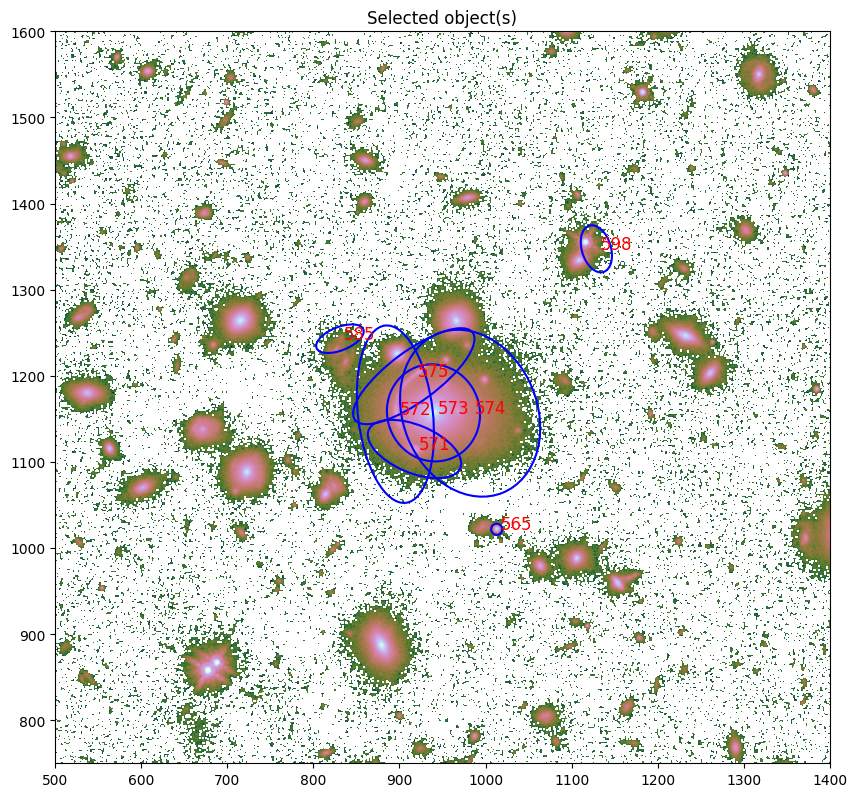

In [13]:
selected_object_ids = [573, 571, 575, 574, 572, 565, 598, 585]
label_selected_objects(selected_object_ids)

## Removing the unwanted objects from the neighboring galaxy list

In [14]:
# All close galaxies

# lens galaxy: 573
# ARC objects: 571, 575, 574, 572, 576
# stars: 565, 598
# unnessery blob: 585

remove_list = [
    573,
    571,
    575,
    574,
    572,
    565,
    585,
    578,
    583,
    582,
    567,
    597,
    570,
    207,
    559,
    330,
    242,
    168,
]

df_all = pd.DataFrame({"Distance(pixels)": dist_galaxies_all})

df_all.set_index(pd.Index(close_galaxies_all), inplace=True)

# Photometric redshift of the deflector galaxy is 0.279
df_all["Distance(megaparsec)"] = distance_parsec(df_all["Distance(pixels)"], 0.279)
df_all["Flux"] = flux_galaxies_all
df_all["Axis Ratio"] = axis_ratios_all

# Sort the DataFrame based on 'Distance'
df_all_sorted = df_all.sort_values(by="Distance(pixels)")

# Exclude unwanted sources
df_all_sys_removed = df_all_sorted.drop(remove_list)

# first 20 galaxies
df_all_20 = df_all_sys_removed.iloc[:20]

print(df_all_20.shape)
print(df_all_20)

(20, 4)
     Distance(pixels)  Distance(megaparsec)         Flux  Axis Ratio
576         38.601993              0.013073   279.998347    0.895394
577         52.142482              0.017659   172.586999    0.808198
579         62.644277              0.021215    80.667084    0.845560
260         69.842551              0.023653   143.320061    0.894332
586         88.701749              0.030040    81.910625    0.692524
248        100.336589              0.033980    29.304243    0.887915
587        110.239698              0.037334  1332.982641    0.969688
274        118.043989              0.039977    11.161541    0.871197
584        125.318828              0.042441    26.599856    0.758152
568        141.868967              0.048046   106.415380    0.605345
566        144.653085              0.048989    55.054212    0.634492
266        156.386375              0.052962    29.915942    0.576196
245        159.196843              0.053914     4.492333    0.603626
236        174.472764     

In [15]:
# Excluding galaxies lower than 1% of the central deflector

# lens galaxy: 573
# ARC objects: 571, 575, 574, 572
# stars: 565, 598
# unnessery blob: 586, 585
# High redshift: 578

remove_list_1 = [
    573,
    571,
    575,
    574,
    572,
    576,
    565,
    578,
    583,
    582,
    567,
    597,
    570,
    207,
    559,
    330,
    242,
    168,
    133,
    554,
    555,
    289,
    252,
    240,
    227,
    344,
    246,
    348,
    369,
    381,
    612,
    261,
    154,
    128,
    91,
    545,
    84,
    382,
    614,
    401,
    141,
    136,
    62,
    79,
    646,
    386,
    295,
    285,
    183,
    99,
    197,
    86,
    543,
    540,
    547,
    640,
    473,
]

df_1 = pd.DataFrame({"Distance(pixels)": dist_galaxies_1})
df_1.set_index(pd.Index(close_galaxies_1), inplace=True)

# Photometric redshift of the deflector galaxy is 0.279
df_1["Distance(megaparsec)"] = distance_parsec(df_1["Distance(pixels)"], 0.279)
df_1["Flux"] = flux_galaxies_1
df_1["Axis Ratios"] = axis_ratios_1

# Sort the DataFrame based on 'Distance'
df_1_sorted = df_1.sort_values(by="Distance(pixels)")

# Exclude the lensing system members
df_1_sys_removed = df_1_sorted.drop(remove_list_1)

# first 20 galaxies
df_1_20 = df_1_sys_removed.iloc[:20]

print(df_1_20.shape)
print(df_1_20)

(20, 4)
     Distance(pixels)  Distance(megaparsec)         Flux  Axis Ratios
577         52.142482              0.017659   172.586999     0.808198
579         62.644277              0.021215    80.667084     0.845560
260         69.842551              0.023653   143.320061     0.894332
586         88.701749              0.030040    81.910625     0.692524
587        110.239698              0.037334  1332.982641     0.969688
568        141.868967              0.048046   106.415380     0.605345
203        216.721486              0.073396   124.207687     0.787064
596        244.784968              0.082900   343.486917     0.810463
283        248.506652              0.084160  1369.301843     0.886560
271        306.055141              0.103650   756.848434     0.541232
562        456.458218              0.154586   122.212042     0.454660
561        494.272110              0.167392  2026.212679     0.624594
440        620.930134              0.210286    73.640932     0.873570
599        6

In [16]:
zoom = 650
set_x_lim1, set_x_lim2 = 800 - zoom, 1100 + zoom
set_y_lim1, set_y_lim2 = 1050 - zoom, 1300 + zoom

## Calculating $\Sigma_{10}$, $\Sigma_{10,\text{flux selected}}$ , $\Sigma_{20}$, $\Sigma_{20,\text{flux selected}}$ and the corresponding radii

## Loading Global Mean

In [17]:
# Read flux data from each YAML file and append to corresponding lists
input_path = "/kaggle/input/global-means-updated/DESIJ21580257_means.yml"

try:
    with open(input_path, "r") as f:
        data_mean = yaml.safe_load(f)
except (AttributeError, yaml.YAMLError) as e:
    print(f"Failed to load the file: {e}")

global_mean_flux_10 = data_mean.get("Global_mean_flux_10")
global_mean_flux_20 = data_mean.get("Global_mean_flux_20")
global_mean_flux_selected_10 = data_mean.get("Global_mean_flux_selected_10")
global_mean_flux_selected_20 = data_mean.get("Global_mean_flux_selected_20")
global_mean_flux_dis_10 = data_mean.get("Global_mean_flux_dis_10")
global_mean_flux_dis_20 = data_mean.get("Global_mean_flux_dis_20")
global_mean_flux_dis_selected_10 = data_mean.get("Global_mean_flux_dis_selected_10")
global_mean_flux_dis_selected_20 = data_mean.get("Global_mean_flux_dis_selected_20")

## Generating a distribution of the Physical distance using Monte Carlo random sampling to calculate uncertainty in sigma densities

In [18]:
z = 0.279  # redshift
z_uncertainty = 0.019  # redshift's uncertainty

# Define a function to estimate uncertainty in the Physical distance using
# Monte Carlo random sampling


def calculate_physical_distance_distribution(
    pixel_distance, z, z_uncertainty, num_samples=10000
):
    # Generate random samples of redshift using normal distribution
    z_samples = np.random.normal(z, z_uncertainty, num_samples)

    # Define a function to calculate physical distance
    # from redshift

    def distance_parsec(pixel_distance, z):
        """Convert distance from unit of pixels into parsec unit.

        :param pixel_distance: distance in unit of pixels

        :param z: photometric redshift

        :return: distance in parsec unit

        """

        wcs = WCS(header)

        # Get the pixel scale in degrees per pixel
        pix_scale_deg = abs(wcs.wcs.cd[0, 0])

        # Convert the pixel scale from degrees to radians
        pix_scale_radian = pix_scale_deg * np.pi / 180

        # Angles in radians
        angles_radian = pixel_distance * pix_scale_radian

        # Define cosmological parameters
        H0 = 70  # Hubble constant in km/s/Mpc
        Om0 = 0.3  # Matter density parameter
        cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

        # Compute the angular diameter distance
        angular_diameter_distance = cosmo.angular_diameter_distance(z)

        # Calculate the physical distance
        physical_distances_mpc = angular_diameter_distance * angles_radian

        return physical_distances_mpc.value

    # Calculate physical distances for each sampled redshift and pixel distance
    physical_distances = distance_parsec(pixel_distance, z_samples)

    return physical_distances

## Method A

In [19]:
# # For all sources
# R_10_all = df_all_20.iloc[
#     9, df_all_20.columns.get_loc("Distance(megaparsec)")
# ]  ## Change
# R_20_all = df_all_20.iloc[
#     19, df_all_20.columns.get_loc("Distance(megaparsec)")
# ]  ## Change
# Sigma_10_allA = 10 / (np.pi * R_10_all**2)
# Sigma_20_allA = 20 / (np.pi * R_20_all**2)

# # Excluding dim sources
# R_10_1 = df_1_20.iloc[9, df_1_20.columns.get_loc("Distance(megaparsec)")]  ## Change
# R_20_1 = df_1_20.iloc[19, df_1_20.columns.get_loc("Distance(megaparsec)")]  ## Change
# Sigma_10_1A = 10 / (np.pi * R_10_1**2)
# Sigma_20_1A = 20 / (np.pi * R_20_1**2)


# print("")
# print("FOR All SOURCES")
# print("R 10:", R_10_all)
# print("R 20:", R_20_all)
# print("Sigma 10:", Sigma_10_allA)
# print("Sigma 20:", Sigma_20_allA)

# print("")
# print("EXCLUDING DIM SOURCES")
# print("R 10:", R_10_1)
# print("R 20:", R_20_1)
# print("Sigma 10:", Sigma_10_1A)
# print("Sigma 20:", Sigma_20_1A)

# For all sources

r_10_all = df_all_20.iloc[9, df_all_20.columns.get_loc("Distance(pixels)")]
R_10_all = calculate_physical_distance_distribution(r_10_all, z, z_uncertainty)

r_20_all = df_all_20.iloc[19, df_all_20.columns.get_loc("Distance(pixels)")]
R_20_all = calculate_physical_distance_distribution(r_20_all, z, z_uncertainty)

Sigma_10_allA_distribution = []
Sigma_20_allA_distribution = []

for i in range(10000):
    Sigma_10_allA = 10 / (np.pi * R_10_all[i] ** 2)
    Sigma_20_allA = 20 / (np.pi * R_20_all[i] ** 2)

    Sigma_10_allA_distribution.append(Sigma_10_allA)
    Sigma_20_allA_distribution.append(Sigma_20_allA)

Sigma_10_allA_mean = np.mean(Sigma_10_allA_distribution)
Sigma_10_allA_std = np.std(Sigma_10_allA_distribution)
Sigma_20_allA_mean = np.mean(Sigma_20_allA_distribution)
Sigma_20_allA_std = np.std(Sigma_20_allA_distribution)

# Excluding dim sources

r_10_1 = df_1_20.iloc[9, df_1_20.columns.get_loc("Distance(pixels)")]
R_10_1 = calculate_physical_distance_distribution(r_10_1, z, z_uncertainty)

r_20_1 = df_1_20.iloc[19, df_1_20.columns.get_loc("Distance(pixels)")]
R_20_1 = calculate_physical_distance_distribution(r_20_1, z, z_uncertainty)

Sigma_10_1A_distribution = []
Sigma_20_1A_distribution = []

for i in range(10000):
    Sigma_10_1A = 10 / (np.pi * R_10_1[i] ** 2)
    Sigma_20_1A = 20 / (np.pi * R_20_1[i] ** 2)

    Sigma_10_1A_distribution.append(Sigma_10_1A)
    Sigma_20_1A_distribution.append(Sigma_20_1A)

Sigma_10_1A_mean = np.mean(Sigma_10_1A_distribution)
Sigma_10_1A_std = np.std(Sigma_10_1A_distribution)
Sigma_20_1A_mean = np.mean(Sigma_20_1A_distribution)
Sigma_20_1A_std = np.std(Sigma_20_1A_distribution)

print("")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10:", Sigma_10_allA_mean, "Std:", Sigma_10_allA_std)
print("Sigma 20:", Sigma_20_allA_mean, "Std:", Sigma_20_allA_std)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10:", Sigma_10_1A_mean, "Std:", Sigma_10_1A_std)
print("Sigma 20:", Sigma_20_1A_mean, "Std:", Sigma_20_1A_std)


FOR All SOURCES
R 10: [0.04299492 0.04608881 0.04891227 ... 0.04632328 0.04820889 0.05151294]
R 20: [0.06684536 0.06314599 0.06426586 ... 0.06294445 0.05996597 0.06959821]
Sigma 10: 1392.7711685537217 Std: 139.63274750495717
Sigma 20: 1489.1838186163002 Std: 148.51696322999462

EXCLUDING DIM SOURCES
R 10: [0.09924813 0.09775455 0.10524911 ... 0.10489479 0.10959539 0.10562346]
R 20: [0.27982019 0.25149609 0.25091366 ... 0.27219287 0.27276615 0.2672219 ]
Sigma 10: 299.10874017888665 Std: 29.67514947418769
Sigma 20: 88.33840325696062 Std: 8.762464853277903


## Method B

In [20]:
# weighted_flux_10_all = np.sum(df_all_20["Flux"][0:10] / global_mean_flux_10)
# weighted_flux_20_all = np.sum(df_all_20["Flux"][0:20] / global_mean_flux_20)
# Sigma_10_allB = weighted_flux_10_all / (np.pi * R_10_all**2)
# Sigma_20_allB = weighted_flux_20_all / (np.pi * R_20_all**2)


# weighted_flux_10_1 = np.sum(df_1_20["Flux"][0:10] / global_mean_flux_selected_10)
# weighted_flux_20_1 = np.sum(df_1_20["Flux"][0:20] / global_mean_flux_selected_20)
# Sigma_10_1B = weighted_flux_10_1 / (np.pi * R_10_1**2)
# Sigma_20_1B = weighted_flux_20_1 / (np.pi * R_20_1**2)


# print("")
# print("Considering Light Flux")
# print("FOR All SOURCES")
# print("R 10:", R_10_all)
# print("R 20:", R_20_all)
# print("Sigma 10_updated:", Sigma_10_allB)
# print("Sigma 20_updated:", Sigma_20_allB)

# print("")
# print("EXCLUDING DIM SOURCES")
# print("R 10:", R_10_1)
# print("R 20:", R_20_1)
# print("Sigma 10_updated:", Sigma_10_1B)
# print("Sigma 20_updated:", Sigma_20_1B)


# For all sources
weighted_flux_10_all = np.sum(df_all_20["Flux"][0:10]) / global_mean_flux_10
weighted_flux_20_all = np.sum(df_all_20["Flux"][0:20]) / global_mean_flux_20

Sigma_10_allB_distribution = []
Sigma_20_allB_distribution = []

for i in range(10000):
    Sigma_10_allB = weighted_flux_10_all / (np.pi * R_10_all[i] ** 2)
    Sigma_20_allB = weighted_flux_20_all / (np.pi * R_20_all[i] ** 2)

    Sigma_10_allB_distribution.append(Sigma_10_allB)
    Sigma_20_allB_distribution.append(Sigma_20_allB)

Sigma_10_allB_mean = np.mean(Sigma_10_allB_distribution)
Sigma_10_allB_std = np.std(Sigma_10_allB_distribution)
Sigma_20_allB_mean = np.mean(Sigma_20_allB_distribution)
Sigma_20_allB_std = np.std(Sigma_20_allB_distribution)

# excluding dim sources
weighted_flux_10_1 = np.sum(df_1_20["Flux"][0:10]) / global_mean_flux_selected_10
weighted_flux_20_1 = np.sum(df_1_20["Flux"][0:20]) / global_mean_flux_selected_20

Sigma_10_1B_distribution = []
Sigma_20_1B_distribution = []

for i in range(10000):
    Sigma_10_1B = weighted_flux_10_1 / (np.pi * R_10_1[i] ** 2)
    Sigma_20_1B = weighted_flux_20_1 / (np.pi * R_20_1[i] ** 2)

    Sigma_10_1B_distribution.append(Sigma_10_1B)
    Sigma_20_1B_distribution.append(Sigma_20_1B)

Sigma_10_1B_mean = np.mean(Sigma_10_1B_distribution)
Sigma_10_1B_std = np.std(Sigma_10_1B_distribution)
Sigma_20_1B_mean = np.mean(Sigma_20_1B_distribution)
Sigma_20_1B_std = np.std(Sigma_20_1B_distribution)


print("")
print("Considering Light Flux")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10_updated:", Sigma_10_allB_mean, "Std:", Sigma_10_allB_std)
print("Sigma 20_updated:", Sigma_20_allB_mean, "Std:", Sigma_20_allB_std)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10_updated:", Sigma_10_1B_mean, "Std:", Sigma_10_1B_std)
print("Sigma 20_updated:", Sigma_20_1B_mean, "Std:", Sigma_20_1B_std)


Considering Light Flux
FOR All SOURCES
R 10: [0.04299492 0.04608881 0.04891227 ... 0.04632328 0.04820889 0.05151294]
R 20: [0.06684536 0.06314599 0.06426586 ... 0.06294445 0.05996597 0.06959821]
Sigma 10_updated: 4438.5248479484035 Std: 444.9858191935659
Sigma 20_updated: 2725.4971895502777 Std: 271.81504447181186

EXCLUDING DIM SOURCES
R 10: [0.09924813 0.09775455 0.10524911 ... 0.10489479 0.10959539 0.10562346]
R 20: [0.27982019 0.25149609 0.25091366 ... 0.27219287 0.27276615 0.2672219 ]
Sigma 10_updated: 630.975564333168 Std: 62.600291034452326
Sigma 20_updated: 242.8340679008829 Std: 24.08720224397223


## Method C

In [21]:
# flux_c_10_all = []
# flux_c_20_all = []
# flux_c_10_1 = []
# flux_c_20_1 = []

# # for all sources
# for i in range(20):
#     flux_all = (
#         df_all_20["Flux"][i : i + 1] / df_all_20["Distance(megaparsec)"][i : i + 1]
#     )

#     if i < 10:
#         flux_c_10_all.append(flux_all)
#         flux_c_20_all.append(flux_all)

#     elif 9 < i < 20:
#         flux_c_20_all.append(flux_all)

# weighted_flux_10_all = np.sum(flux_c_10_all) / global_mean_flux_dis_10
# weighted_flux_20_all = np.sum(flux_c_20_all) / global_mean_flux_dis_20
# Sigma_10_allC = weighted_flux_10_all / (np.pi * R_10_all**2)
# Sigma_20_allC = weighted_flux_20_all / (np.pi * R_20_all**2)

# # excluding dim sources
# for i in range(20):
#     flux_1 = df_1_20["Flux"][i : i + 1] / df_1_20["Distance(megaparsec)"][i : i + 1]

#     if i < 10:
#         flux_c_10_1.append(flux_1)
#         flux_c_20_1.append(flux_1)

#     elif 9 < i < 20:
#         flux_c_20_1.append(flux_1)

# weighted_flux_10_1 = np.sum(flux_c_10_1) / global_mean_flux_dis_selected_10
# weighted_flux_20_1 = np.sum(flux_c_20_1) / global_mean_flux_dis_selected_20
# Sigma_10_1C = weighted_flux_10_1 / (np.pi * R_10_1**2)
# Sigma_20_1C = weighted_flux_20_1 / (np.pi * R_20_1**2)


# print("")
# print("Considering Light Flux And Distance")
# print("FOR All SOURCES")
# print("R 10:", R_10_all)
# print("R 20:", R_20_all)
# print("Sigma 10_updated:", Sigma_10_allC)
# print("Sigma 20_updated:", Sigma_20_allC)

# print("")
# print("EXCLUDING DIM SOURCES")
# print("R 10:", R_10_1)
# print("R 20:", R_20_1)
# print("Sigma 10_updated:", Sigma_10_1C)
# print("Sigma 20_updated:", Sigma_20_1C)

flux_c_10_all = []
flux_c_20_all = []
flux_c_10_1 = []
flux_c_20_1 = []

# for all sources
for i in range(20):
    flux_all = (
        df_all_20["Flux"][i : i + 1] / df_all_20["Distance(megaparsec)"][i : i + 1]
    )

    if i < 10:
        flux_c_10_all.append(flux_all)
        flux_c_20_all.append(flux_all)

    elif 9 < i < 20:
        flux_c_20_all.append(flux_all)

weighted_flux_10_all = np.sum(flux_c_10_all) / global_mean_flux_dis_10
weighted_flux_20_all = np.sum(flux_c_20_all) / global_mean_flux_dis_20

Sigma_10_allC_distribution = []
Sigma_20_allC_distribution = []

for i in range(10000):
    Sigma_10_allC = weighted_flux_10_all / (np.pi * R_10_all[i] ** 2)
    Sigma_20_allC = weighted_flux_20_all / (np.pi * R_20_all[i] ** 2)

    Sigma_10_allC_distribution.append(Sigma_10_allC)
    Sigma_20_allC_distribution.append(Sigma_20_allC)

Sigma_10_allC_mean = np.mean(Sigma_10_allC_distribution)
Sigma_10_allC_std = np.std(Sigma_10_allC_distribution)
Sigma_20_allC_mean = np.mean(Sigma_20_allC_distribution)
Sigma_20_allC_std = np.std(Sigma_20_allC_distribution)


# excluding dim sources
for i in range(20):
    flux_1 = df_1_20["Flux"][i : i + 1] / df_1_20["Distance(megaparsec)"][i : i + 1]

    if i < 10:
        flux_c_10_1.append(flux_1)
        flux_c_20_1.append(flux_1)

    elif 9 < i < 20:
        flux_c_20_1.append(flux_1)

weighted_flux_10_1 = np.sum(flux_c_10_1) / global_mean_flux_dis_selected_10
weighted_flux_20_1 = np.sum(flux_c_20_1) / global_mean_flux_dis_selected_20

Sigma_10_1C_distribution = []
Sigma_20_1C_distribution = []

for i in range(10000):
    Sigma_10_1C = weighted_flux_10_1 / (np.pi * R_10_1[i] ** 2)
    Sigma_20_1C = weighted_flux_20_1 / (np.pi * R_20_1[i] ** 2)

    Sigma_10_1C_distribution.append(Sigma_10_1C)
    Sigma_20_1C_distribution.append(Sigma_20_1C)

Sigma_10_1C_mean = np.mean(Sigma_10_1C_distribution)
Sigma_10_1C_std = np.std(Sigma_10_1C_distribution)
Sigma_20_1C_mean = np.mean(Sigma_20_1C_distribution)
Sigma_20_1C_std = np.std(Sigma_20_1C_distribution)

print("")
print("Considering Light Flux And Distance")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10_updated:", Sigma_10_allC_mean, "Std:", Sigma_10_allC_std)
print("Sigma 20_updated:", Sigma_20_allC_mean, "Std:", Sigma_20_allC_std)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10_updated:", Sigma_10_1C_mean, "Std:", Sigma_10_1C_std)
print("Sigma 20_updated:", Sigma_20_1C_mean, "Std:", Sigma_20_1C_std)


Considering Light Flux And Distance
FOR All SOURCES
R 10: [0.04299492 0.04608881 0.04891227 ... 0.04632328 0.04820889 0.05151294]
R 20: [0.06684536 0.06314599 0.06426586 ... 0.06294445 0.05996597 0.06959821]
Sigma 10_updated: 10894.777891703248 Std: 1092.259665350842
Sigma 20_updated: 7184.401286462732 Std: 716.5035292167876

EXCLUDING DIM SOURCES
R 10: [0.09924813 0.09775455 0.10524911 ... 0.10489479 0.10959539 0.10562346]
R 20: [0.27982019 0.25149609 0.25091366 ... 0.27219287 0.27276615 0.2672219 ]
Sigma 10_updated: 1199.1005653608877 Std: 118.96505762548443
Sigma 20_updated: 338.7069134424223 Std: 33.59702366329119


## Method D

In [22]:
# # Initialize flux variables
# flux_d_10_all = []
# flux_d_20_all = []
# flux_d_10_1 = []
# flux_d_20_1 = []

# # Define a short radius
# pixel_distance = 125  # for 10 arcseconds

# # Mean Photometric redshift of all the deflectors is 0.581
# s = distance_parsec(pixel_distance, 0.581).value

# # Process both dataframes
# for i in range(20):
#     distance_all = df_all_20["Distance(megaparsec)"].iloc[i]
#     flux_all = df_all_20["Flux"].iloc[i]
#     distance_1 = df_1_20["Distance(megaparsec)"].iloc[i]
#     flux_1 = df_1_20["Flux"].iloc[i]

#     # Processing for df_all_20
#     if i < 10:
#         if distance_all <= s:
#             flux_contrib_all = flux_all / s
#         else:
#             flux_contrib_all = flux_all / distance_all

#         flux_d_10_all.append(flux_contrib_all)
#         flux_d_20_all.append(flux_contrib_all)

#     elif 9 < i < 20:
#         if distance_all <= s:
#             flux_contrib_all = flux_all / s
#         else:
#             flux_contrib_all = flux_all / distance_all

#         flux_d_20_all.append(flux_contrib_all)

#     # Processing for df_1_20
#     if i < 10:
#         if distance_1 <= s:
#             flux_contrib_1 = flux_1 / s
#         else:
#             flux_contrib_1 = flux_1 / distance_1

#         flux_d_10_1.append(flux_contrib_1)
#         flux_d_20_1.append(flux_contrib_1)

#     elif 9 < i < 20:
#         if distance_1 <= s:
#             flux_contrib_1 = flux_1 / s
#         else:
#             flux_contrib_1 = flux_1 / distance_1

#         flux_d_20_1.append(flux_contrib_1)

# weighted_flux_10_all = np.sum(flux_d_10_all) / global_mean_flux_dis_10
# weighted_flux_20_all = np.sum(flux_d_20_all) / global_mean_flux_dis_20
# Sigma_10_allD = weighted_flux_10_all / (np.pi * R_10_all**2)
# Sigma_20_allD = weighted_flux_20_all / (np.pi * R_20_all**2)

# weighted_flux_10_1 = np.sum(flux_d_10_1) / global_mean_flux_dis_selected_10
# weighted_flux_20_1 = np.sum(flux_d_20_1) / global_mean_flux_dis_selected_20
# Sigma_10_1D = weighted_flux_10_1 / (np.pi * R_10_1**2)
# Sigma_20_1D = weighted_flux_20_1 / (np.pi * R_20_1**2)


# # Print results
# print("")
# print("Considering Light Flux And Distance")
# print("FOR All SOURCES")
# print("R 10:", R_10_all)
# print("R 20:", R_20_all)
# print("Sigma 10_updated:", Sigma_10_allD)
# print("Sigma 20_updated:", Sigma_20_allD)

# print("")
# print("EXCLUDING DIM SOURCES")
# print("R 10:", R_10_1)
# print("R 20:", R_20_1)
# print("Sigma 10_updated:", Sigma_10_1D)
# print("Sigma 20_updated:", Sigma_20_1D)


# Initialize flux variables
flux_d_10_all = []
flux_d_20_all = []
flux_d_10_1 = []
flux_d_20_1 = []

# Define a short radius
pixel_distance = 125  # for 10 arcseconds

# Mean Photometric redshift of all the deflectors is 0.581
s = distance_parsec(pixel_distance, 0.581).value

# Process both dataframes
for i in range(20):
    distance_all = df_all_20["Distance(megaparsec)"].iloc[i]
    flux_all = df_all_20["Flux"].iloc[i]
    distance_1 = df_1_20["Distance(megaparsec)"].iloc[i]
    flux_1 = df_1_20["Flux"].iloc[i]

    # Processing for df_all_20
    if i < 10:
        if distance_all <= s:
            flux_contrib_all = flux_all / s
        else:
            flux_contrib_all = flux_all / distance_all

        flux_d_10_all.append(flux_contrib_all)
        flux_d_20_all.append(flux_contrib_all)

    elif 9 < i < 20:
        if distance_all <= s:
            flux_contrib_all = flux_all / s
        else:
            flux_contrib_all = flux_all / distance_all

        flux_d_20_all.append(flux_contrib_all)

    # Processing for df_1_20
    if i < 10:
        if distance_1 <= s:
            flux_contrib_1 = flux_1 / s
        else:
            flux_contrib_1 = flux_1 / distance_1

        flux_d_10_1.append(flux_contrib_1)
        flux_d_20_1.append(flux_contrib_1)

    elif 9 < i < 20:
        if distance_1 <= s:
            flux_contrib_1 = flux_1 / s
        else:
            flux_contrib_1 = flux_1 / distance_1

        flux_d_20_1.append(flux_contrib_1)

weighted_flux_10_all = np.sum(flux_d_10_all) / global_mean_flux_dis_10
weighted_flux_20_all = np.sum(flux_d_20_all) / global_mean_flux_dis_20

Sigma_10_allD_distribution = []
Sigma_20_allD_distribution = []

for i in range(10000):
    Sigma_10_allD = weighted_flux_10_all / (np.pi * R_10_all[i] ** 2)
    Sigma_20_allD = weighted_flux_20_all / (np.pi * R_20_all[i] ** 2)

    Sigma_10_allD_distribution.append(Sigma_10_allD)
    Sigma_20_allD_distribution.append(Sigma_20_allD)

Sigma_10_allD_mean = np.mean(Sigma_10_allD_distribution)
Sigma_10_allD_std = np.std(Sigma_10_allD_distribution)
Sigma_20_allD_mean = np.mean(Sigma_20_allD_distribution)
Sigma_20_allD_std = np.std(Sigma_20_allD_distribution)

# Excluding dim sources
weighted_flux_10_1 = np.sum(flux_d_10_1) / global_mean_flux_dis_selected_10
weighted_flux_20_1 = np.sum(flux_d_20_1) / global_mean_flux_dis_selected_20


Sigma_10_1D_distribution = []
Sigma_20_1D_distribution = []

for i in range(10000):
    Sigma_10_1D = weighted_flux_10_1 / (np.pi * R_10_1[i] ** 2)
    Sigma_20_1D = weighted_flux_20_1 / (np.pi * R_20_1[i] ** 2)

    Sigma_10_1D_distribution.append(Sigma_10_1D)
    Sigma_20_1D_distribution.append(Sigma_20_1D)

Sigma_10_1D_mean = np.mean(Sigma_10_1D_distribution)
Sigma_10_1D_std = np.std(Sigma_10_1D_distribution)
Sigma_20_1D_mean = np.mean(Sigma_20_1D_distribution)
Sigma_20_1D_std = np.std(Sigma_20_1D_distribution)

# Print results
print("")
print("Considering Light Flux And Distance")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10_updated:", Sigma_10_allD_mean, "Std:", Sigma_10_allD_std)
print("Sigma 20_updated:", Sigma_20_allD_mean, "Std:", Sigma_20_allD_std)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10_updated:", Sigma_10_1D_mean, "Std:", Sigma_10_1D_std)
print("Sigma 20_updated:", Sigma_20_1D_mean, "Std:", Sigma_20_1D_std)


Considering Light Flux And Distance
FOR All SOURCES
R 10: [0.04299492 0.04608881 0.04891227 ... 0.04632328 0.04820889 0.05151294]
R 20: [0.06684536 0.06314599 0.06426586 ... 0.06294445 0.05996597 0.06959821]
Sigma 10_updated: 4489.4868647717085 Std: 450.09503353408195
Sigma 20_updated: 3046.2183070605643 Std: 303.8007038785979

EXCLUDING DIM SOURCES
R 10: [0.09924813 0.09775455 0.10524911 ... 0.10489479 0.10959539 0.10562346]
R 20: [0.27982019 0.25149609 0.25091366 ... 0.27219287 0.27276615 0.2672219 ]
Sigma 10_updated: 782.5533267207167 Std: 77.638610386549
Sigma 20_updated: 246.71112799969418 Std: 24.471775675201904


## Save the final deriverables to the YAML file

In [23]:
# convert the numpy.float64 values to floats

Sigma_10_1A_mean = Sigma_10_1A_mean.item()
Sigma_20_1A_mean = Sigma_20_1A_mean.item()
Sigma_10_allA_mean = Sigma_10_allA_mean.item()
Sigma_20_allA_mean = Sigma_20_allA_mean.item()
Sigma_10_1A_std = Sigma_10_1A_std.item()
Sigma_20_1A_std = Sigma_20_1A_std.item()
Sigma_10_allA_std = Sigma_10_allA_std.item()
Sigma_20_allA_std = Sigma_20_allA_std.item()

Sigma_10_1B_mean = Sigma_10_1B_mean.item()
Sigma_20_1B_mean = Sigma_20_1B_mean.item()
Sigma_10_allB_mean = Sigma_10_allB_mean.item()
Sigma_20_allB_mean = Sigma_20_allB_mean.item()
Sigma_10_1B_std = Sigma_10_1B_std.item()
Sigma_20_1B_std = Sigma_20_1B_std.item()
Sigma_10_allB_std = Sigma_10_allB_std.item()
Sigma_20_allB_std = Sigma_20_allB_std.item()

Sigma_10_1C_mean = Sigma_10_1C_mean.item()
Sigma_20_1C_mean = Sigma_20_1C_mean.item()
Sigma_10_allC_mean = Sigma_10_allC_mean.item()
Sigma_20_allC_mean = Sigma_20_allC_mean.item()
Sigma_10_1C_std = Sigma_10_1C_std.item()
Sigma_20_1C_std = Sigma_20_1C_std.item()
Sigma_10_allC_std = Sigma_10_allC_std.item()
Sigma_20_allC_std = Sigma_20_allC_std.item()

Sigma_10_1D_mean = Sigma_10_1D_mean.item()
Sigma_20_1D_mean = Sigma_20_1D_mean.item()
Sigma_10_allD_mean = Sigma_10_allD_mean.item()
Sigma_20_allD_mean = Sigma_20_allD_mean.item()
Sigma_10_1D_std = Sigma_10_1D_std.item()
Sigma_20_1D_std = Sigma_20_1D_std.item()
Sigma_10_allD_std = Sigma_10_allD_std.item()
Sigma_20_allD_std = Sigma_20_allD_std.item()

In [24]:
src_path = r"/kaggle/input/point-estimates/DESIJ21580257_point_estimates.yml"
dst_path = r"/kaggle/working/"
shutil.copy(src_path, dst_path)

# Existing YAML file with other parameters
existing_yaml_file = "DESIJ21580257_point_estimates.yml"

# Variables to include in the YAML file
environment_variables = {
    "Sigma_10a_flux_selected": [Sigma_10_1A_mean, Sigma_10_1A_std],
    "Sigma_20a_flux_selected": [Sigma_20_1A_mean, Sigma_20_1A_std],
    "Sigma_10a": [Sigma_10_allA_mean, Sigma_10_allA_std],
    "Sigma_20a": [Sigma_20_allA_mean, Sigma_20_allA_std],
    "Sigma_10b_flux_selected": [Sigma_10_1B_mean, Sigma_10_1B_std],
    "Sigma_20b_flux_selected": [Sigma_20_1B_mean, Sigma_20_1B_std],
    "Sigma_10b": [Sigma_10_allB_mean, Sigma_10_allB_std],
    "Sigma_20b": [Sigma_20_allB_mean, Sigma_20_allB_std],
    "Sigma_10c_flux_selected": [Sigma_10_1C_mean, Sigma_10_1C_std],
    "Sigma_20c_flux_selected": [Sigma_20_1C_mean, Sigma_20_1C_std],
    "Sigma_10c": [Sigma_10_allC_mean, Sigma_10_allC_std],
    "Sigma_20c": [Sigma_20_allC_mean, Sigma_20_allC_std],
    "Sigma_10d_flux_selected": [Sigma_10_1D_mean, Sigma_10_1D_std],
    "Sigma_20d_flux_selected": [Sigma_20_1D_mean, Sigma_20_1D_std],
    "Sigma_10d": [Sigma_10_allD_mean, Sigma_10_allD_std],
    "Sigma_20d": [Sigma_20_allD_mean, Sigma_20_allD_std],
}

# make all the numpy variales to float
environment_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in environment_variables.items()
}

# Load existing YAML content if the file exists
existing_content = {}
try:
    with open(existing_yaml_file, "r") as file:
        existing_content = yaml.safe_load(file)
except FileNotFoundError:
    pass

# Update the existing content with new variables
existing_content.update(environment_variables)

# Write the updated content back to the YAML file
with open(existing_yaml_file, "w") as file:
    yaml.dump(existing_content, file, default_flow_style=False)

## Visualization

/tmp/ipykernel_17/854336753.py:17: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/854336753.py:17: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/854336753.py:20: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/854336753.py:20: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/854336753.py:23: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/854336753.py:23: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap=

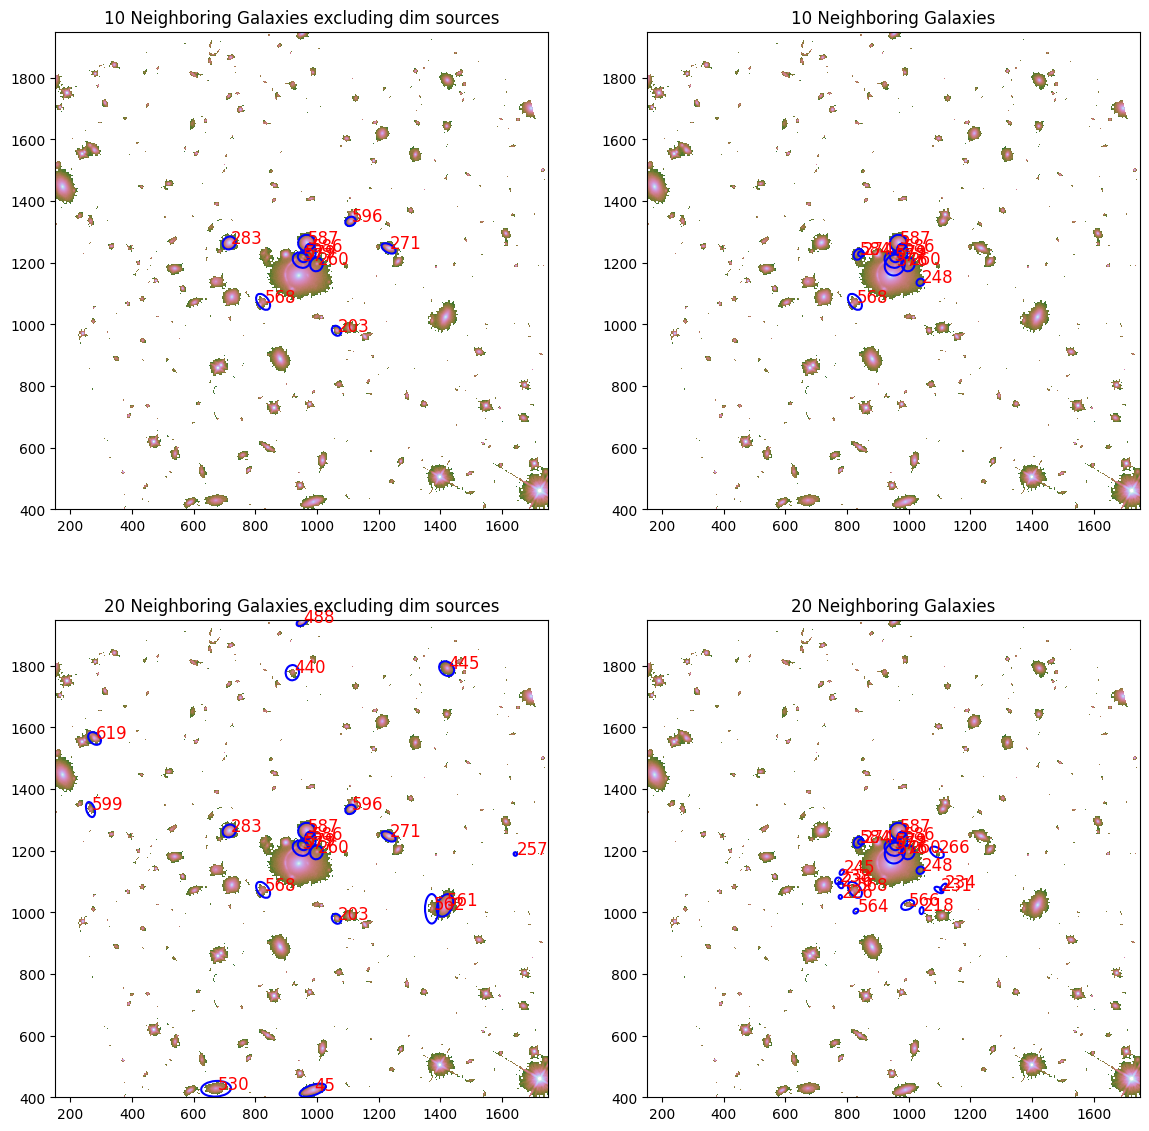

In [25]:
close_ids_all = list(df_all_20.index.values)
close_ids_all_10 = close_ids_all[:10]

updated_close_ids_all = [s + 1 for s in close_ids_all]
updated_close_ids_all_10 = updated_close_ids_all[:10]

close_ids_1 = list(df_1_20.index.values)
close_ids_1_10 = close_ids_1[:10]

updated_close_ids_1 = [s + 1 for s in close_ids_1]
updated_close_ids_1_10 = updated_close_ids_1[:10]

norm = simple_norm(data, "sqrt")
fig, axs = plt.subplots(2, 2, figsize=(14, 14))  # , figsize=(10, 12.5)

axs[0, 0].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
axs[0, 1].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
axs[1, 0].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
axs[1, 1].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)

cat_subset_1_10 = cat.get_labels(updated_close_ids_1_10)
cat_subset_1_10.plot_kron_apertures(ax=axs[0, 0], color="blue", lw=1.5)

cat_subset_all_10 = cat.get_labels(updated_close_ids_all_10)
cat_subset_all_10.plot_kron_apertures(ax=axs[0, 1], color="blue", lw=1.5)

cat_subset_all = cat.get_labels(updated_close_ids_1)
cat_subset_all.plot_kron_apertures(ax=axs[1, 0], color="blue", lw=1.5)

cat_subset_1 = cat.get_labels(updated_close_ids_all)
cat_subset_1.plot_kron_apertures(ax=axs[1, 1], color="blue", lw=1.5)

axs[0, 0].set_title("10 Neighboring Galaxies excluding dim sources")
axs[0, 1].set_title("10 Neighboring Galaxies")
axs[1, 0].set_title("20 Neighboring Galaxies excluding dim sources")
axs[1, 1].set_title("20 Neighboring Galaxies")

for i in close_ids_1_10:
    axs[0, 0].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

for i in close_ids_all_10:
    axs[0, 1].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

for i in close_ids_1:
    axs[1, 0].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

for i in close_ids_all:
    axs[1, 1].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

axs[0, 0].set_xlim(set_x_lim1, set_x_lim2)
axs[0, 0].set_ylim(set_y_lim1, set_y_lim2)

axs[0, 1].set_xlim(set_x_lim1, set_x_lim2)
axs[0, 1].set_ylim(set_y_lim1, set_y_lim2)

axs[1, 0].set_xlim(set_x_lim1, set_x_lim2)
axs[1, 0].set_ylim(set_y_lim1, set_y_lim2)

axs[1, 1].set_xlim(set_x_lim1, set_x_lim2)
axs[1, 1].set_ylim(set_y_lim1, set_y_lim2)

# hide all text outside of the axes
axs[0, 0].set_clip_on(True)
axs[0, 0].set_clip_box(axs[0, 0].bbox)

axs[0, 1].set_clip_on(True)
axs[0, 1].set_clip_box(axs[0, 0].bbox)

axs[1, 0].set_clip_on(True)
axs[1, 0].set_clip_box(axs[0, 0].bbox)

axs[1, 1].set_clip_on(True)
axs[1, 1].set_clip_box(axs[0, 0].bbox)

## Determining the mean for normalizing

In [26]:
# Mean of Fluxes
flux_10_mean = np.mean(df_all_20["Flux"][0:10])
flux_20_mean = np.mean(df_all_20["Flux"][0:20])
flux_10_1_mean = np.mean(df_1_20["Flux"][0:10])
flux_20_1_mean = np.mean(df_1_20["Flux"][0:20])

# Mean of Flux/Distance
flux_d_10_mean = np.mean(flux_d_10_all)
flux_d_20_mean = np.mean(flux_d_20_all)
flux_d_10_1_mean = np.mean(flux_d_10_1)
flux_d_20_1_mean = np.mean(flux_d_20_1)

print(flux_10_mean, flux_20_mean, flux_10_1_mean, flux_20_1_mean)
print(flux_d_10_mean, flux_d_20_mean, flux_d_10_1_mean, flux_d_20_1_mean)

226.49467764436886 120.05664617126055 451.17276697611396 487.94082053702675
3439.480111696882 1823.144151013769 5853.227364947546 4177.693012279636


In [27]:
mean_variables = {
    "Flux_10b_mean": flux_10_mean,
    "Flux_20b_mean": flux_20_mean,
    "Flux_selected_10b_mean": flux_10_1_mean,
    "Flux_selected_20b_mean": flux_20_1_mean,
    "Flux_dis_10_mean": flux_d_10_mean,
    "Flux_dis_20_mean": flux_d_20_mean,
    "Flux_dis_10_1_mean": flux_d_10_1_mean,
    "Flux_dis_20_1_mean": flux_d_20_1_mean,
}

# make all the numpy variales to float
mean_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in mean_variables.items()
}

In [28]:
# Write the dictionary to a YAML file
yaml_file_name = "DESIJ2158+0257_means.yml"
with open(yaml_file_name, "w") as yaml_file:
    yaml.dump(mean_variables, yaml_file, default_flow_style=False)
print(f"YAML file '{yaml_file_name}' created successfully.")

YAML file 'DESIJ2158+0257_means.yml' created successfully.
